# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** RISNA DWI INDRIANI
- **Email:** mc009d5x2320@student.devacademy.id
- **ID Dicoding:** MC009D52320

## Menentukan Pertanyaan Bisnis

1: Bagaimana season mempengaruhi jumlah pengguna bike sharing?
2. Bagaimana jumlah pengguna sepeda yang digunakan pada saat weekday dan workingday?

## Import Semua Packages/Library yang Digunakan
Sebelum memulai tahapan dalam analisis data, import semua library yang akan di butuhkan.


In [952]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling
Data Wrangling adalah sebuah tahapan dalam pengumpulan data, penilaian data, dan pembersihan data sebelum digunakan untuk proses analisis data

### Gathering Data
Tahap pertama yang akan kita lakukan adalah pengumpulan data yang kita butuhkan untuk menjawab semua pertanyaan bisnis yang sudah ditetapkan diawal.

In [953]:
#load data
df = pd.read_csv(r"D:\SUBMISSION_ANALISIS_DATA\data\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada tahap gathering ini, saya mengumpulkan 2 dataset yang menjelaskan tentang bike sharing. Tujuan dari projek ini adalah untuk mengetahui peningkatan pengguna bike sharing pada bulan dan musim tertentu.
- Jika dilihat dari dataset yang sudah saya load tidak ada data yang hilang sehingga dataset tersebut siap untuk masuk ke tahap selanjutnya yaitu assessing data.

### Assessing Data
Tahap kedua yaitu proses penilaian. proses ini dilakukan untuk mengetahui apakah data yang tadi kita kumpulkan terdapat missing value, understand value, dll.

- Mengecek tipe data

In [954]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat ketidaksesuaian tipe data pada kolom dteday sehinggan data perlu diperbaiki. perbaikan : dteday --> datetime

* Mengecek missing value

In [955]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil di atas tidak terdapat missing value

* Mengecek duplikat

In [956]:
df.duplicated().sum()

np.int64(0)

Berdasarkan hasil diatas tidak terdapat data yang terduplikasi

* Rangkuman statistik

In [957]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [958]:
# mengecek jumlah baris dan kolom dalam dataset
print(df.shape)

(731, 16)


**Insight:**
- Setelah dilakukan pengumpulan data tahap selanjutnya yaitu assesing data. pada tahap ini semua data akan di periksa untuk mengetahui apakah data yang telah dikumpulkan tersebut mengandung missing value, duplikat data, ataupun terdapat type data yang tidak sesuai dengan yang seharusnya.
- pada tahap tidak ditemukan missing value ataupun duplikat data, akan tetapi terdapat perbedaan tipe data pada kolom dteday. untuk perbaikan akan kita lakukan pada proses selanjutnya yaitu cleansing data.

### Cleaning Data
Tahap terakhir dari data wrangling adalah cleansing data. pada tahap ini data yang bermasalah seperti terdapat missing value, duplikat data ataupun ada tipe data yang tidak sesuai akan di bersihkan dan diperbaiki.

# Mengubah nama kolom dateday, yr, mnth
untuk mempermudah proses analisis data saya mengubah beberapa nama judul kolom.

In [959]:
df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count'
}, inplace=True)

df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [960]:
# Mengubah tipe data dteday menjadi datetime
df['dateday'] = pd.to_datetime(df['dateday'])

df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [961]:
# Mengubah nilai variabel season
def find_season(season):
    season_string = {1: 'Fall', 2:'Spring', 3:'Summer', 4:'Winter'}
    return season_string.get(season)
season_list = []

for season in df['season']:
    season = find_season(season)
    season_list.append(season)
df['season'] = season_list

In [962]:
df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Fall,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Fall,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Fall,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Fall,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Fall,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [963]:
# Mengubah nilai variabel weekday
df['weekday'] = df['dateday'].dt.day_name()

In [964]:
df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Fall,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Fall,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Fall,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Fall,0,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Fall,0,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Menyimpan dataset yang sudah bersih

In [965]:
df.to_csv('all.csv', index=False)

**Insight:**
- Karena diproses sebelumnya terdapat perbedaan tipe data maka ditahap ini saya melakukan pengubahan tipe data pada kolom dateday menjadi datetime.
- Guna mempermudah proses analisis data saya juga mengubah beberapa nama judul kolom dan juga nilai dari variabel season dan variabel weekday.

## Exploratory Data Analysis (EDA)
EDA adalah proses dimana kita akan memperoleh insight dan juga menjawab pertanyaan bisnis yang sudah di tetapkan diawal dari data yang sudah dibersihkan.

### Explore ...

In [966]:
# Melihat nama kolom
df.columns

Index(['instant', 'dateday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [967]:
# Melihat rincian DataFrame
df.info

<bound method DataFrame.info of      instant    dateday season  year  month  holiday    weekday  workingday  \
0          1 2011-01-01   Fall     0      1        0   Saturday           0   
1          2 2011-01-02   Fall     0      1        0     Sunday           0   
2          3 2011-01-03   Fall     0      1        0     Monday           1   
3          4 2011-01-04   Fall     0      1        0    Tuesday           1   
4          5 2011-01-05   Fall     0      1        0  Wednesday           1   
..       ...        ...    ...   ...    ...      ...        ...         ...   
726      727 2012-12-27   Fall     1     12        0   Thursday           1   
727      728 2012-12-28   Fall     1     12        0     Friday           1   
728      729 2012-12-29   Fall     1     12        0   Saturday           0   
729      730 2012-12-30   Fall     1     12        0     Sunday           0   
730      731 2012-12-31   Fall     1     12        0     Monday           1   

     weathersit    

In [968]:
# Melihat rangkuman statistik
df.describe()

,instant,dateday,year,month,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,0.028728,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,0.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,0.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,0.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,1.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [969]:
# jumlah maksimal dan minimal pengguna sepeda berdasarkan season
df.groupby(by='season').agg({
    'registered': ['max', 'min'],
    'casual': ['max', 'min']
})

registered      casual     
              max  min    max  min
season                            
Fall         5315  416   3155    9
Spring       6456  674   3410  120
Summer       6917  889   3160  118
Winter       6946   20   3031    2

Dari hasil tabel diatas dapat disimpulkan bahwa bike sharing memperoleh pengguna registered terbanyak pada musim dingin, dan jumlah pengguna bike sharing terendah adalah musim dingin. sedangkan pada pengguna casual, musim terbanyak yang memakai jasa bike sharing adalah musim semi dan yang paling sedikit memperoleh pengguna casual adalah musim dingin.

In [970]:
# jumlah maksimal dan minimal pengguna sepeda berdasarkan weekday
df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'sum']
})

count              
            max   min     sum
weekday                      
Friday     8362  1167  487790
Monday     7525    22  455503
Saturday   8714   627  477807
Sunday     8227   605  444027
Thursday   7804   431  485395
Tuesday    7767   683  469109
Wednesday  8173   441  473048

Berdasarkan tabel diatas diperoleh informasi bahwa jumlah pengguna bike sharing terbanyak ada di hari sabtu dan jumlah pengguna terendah di hari senin

In [971]:
# jumlah maksimal dan minimal pengguna sepeda berdasarkan holiday
# 0 = hari libur
# 1 = hari kerja
df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'sum']
})

count               
          max   min      sum
holiday                     
0        8714    22  3214244
1        7403  1000    78435

Dari tabel diatas dapat disimpulkan bahwa jumlah pengguna bike sharing paling banyak adalah pada hari libur, sedangkan jumlah pengguna paling sedikit adalah pada hari kerja

In [972]:
# jumlah maksimal dan minimal pengguna sepeda berdasarkan workingday
# 0 = workingday
# 1 = hari libur
df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'sum']
})

count              
             max  min      sum
workingday                    
0           8714  605  1000269
1           8362   22  2292410

Dari tabel diatas dapat disimpulkan bahwa pengguna paling banyak adalah pada hari kerja dan jumlah pengguna paling sedikit adalah pada hari libur.

**Insight:**
- Berdasarkan data-data yang sudah di kelompokkan berdasarkan season, workingday, weekday, dan holiday dapat disimpulkan bahwa setiap kelompok data tersebut mempunya hasil yang berbeda-beda. 
- Pada kelompok data pengguna bike sharing berdasarkan season, pengguna registered paling banyak yang memakai jasa bike sharing adalah musim dingin dan paling sedikit pada musim dingin. sedangkan untuk pengguna casual jumlah paling banyak yang memakai jasa bike sharing yaitu pada musim semi dan pengguna paling sedikit yaitu pada musim dingin.
- pada kelompok data workingday pengguna paling banyak yaitu pada hari kerja dan pengguna paling sedikit yaitu pada hari libur.
- pada kelompok data weekday pengguna paling banyak ada di hari sabtu dan pengguna paling sedikit ada di hari senin.
- dan untuk kelompok data paling terakhir yaitu yang berdasarkan holiday, pengguna dengan jumlah paling banyak ada di hari libur dan pengguna paling sedikit ada di hari kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana season mempengaruhi jumlah pengguna bike sharing?

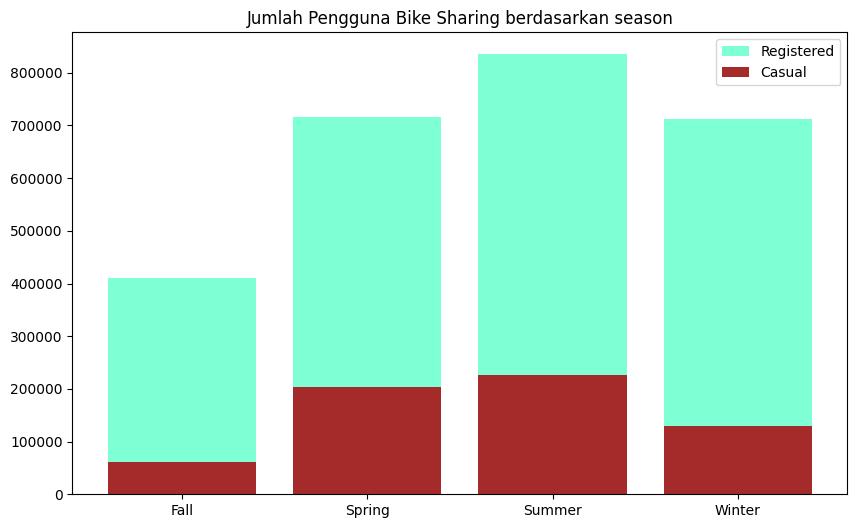

In [973]:
seasonal_usage = df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='#7FFFD4'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='#A52A2A'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah Pengguna Bike Sharing berdasarkan season')
plt.legend()
plt.show()

### Pertanyaan 2: Bagaimana jumlah pengguna sepeda yang digunakan pada saat weekday dan workingday?

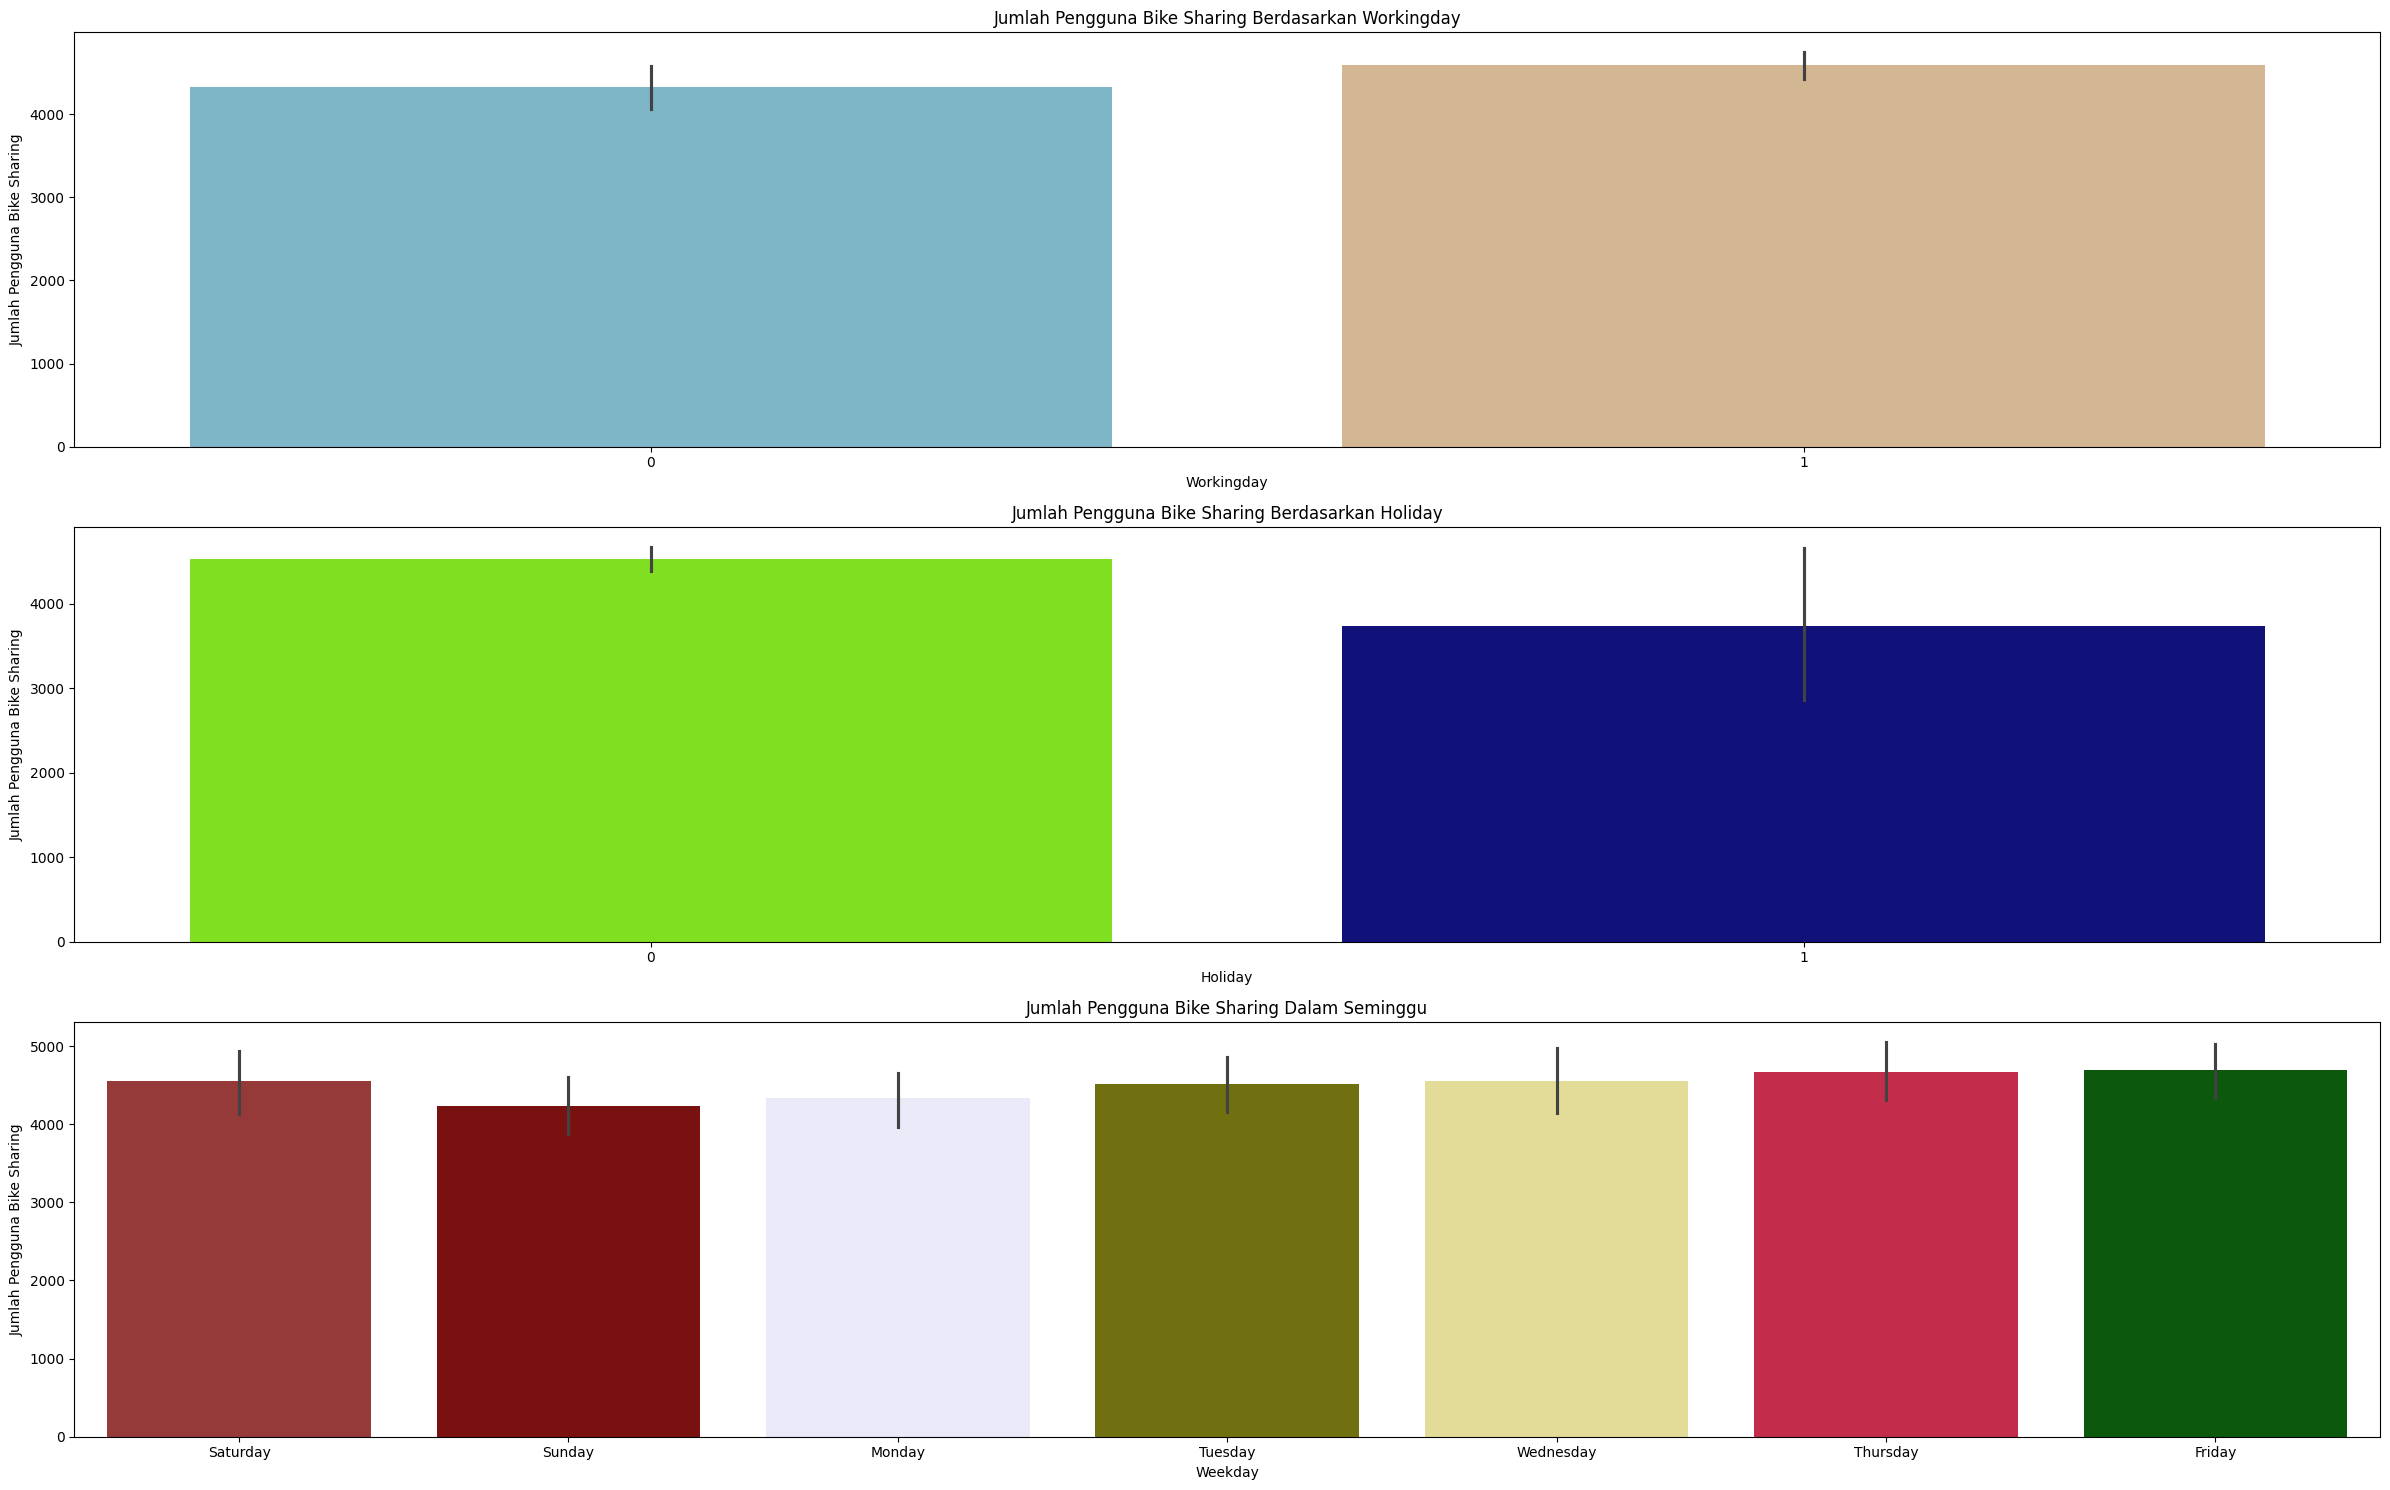

In [974]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(24,15))
colors = ["#72BCD4", "#DEB887"]
color = ['#7FFF00', '#00008B']
warna = ['#A52A2A', '#8B0000', '#E6E6FA', '#808000', '#F0E68C', '#DC143C', '#006400']

# Berdasarkan workingday
sns.barplot(x='workingday', y='count', data=df, hue='workingday', palette=colors, legend=False, ax=axes[0])

axes[0].set_xlabel('Workingday')
axes[0].set_ylabel('Jumlah Pengguna Bike Sharing')
axes[0].set_title('Jumlah Pengguna Bike Sharing Berdasarkan Workingday')

# Berdasarkan holiday
sns.barplot(x='holiday',y='count',data=df, hue='holiday', palette=color, legend=False, ax=axes[1])

axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Jumlah Pengguna Bike Sharing')
axes[1].set_title('Jumlah Pengguna Bike Sharing Berdasarkan Holiday')

# Berdasarkan weekday
sns.barplot(x='weekday',y='count',data=df, hue='weekday', palette=warna,legend=False, ax=axes[2])

axes[2].set_xlabel('Weekday')
axes[2].set_ylabel('Jumlah Pengguna Bike Sharing')
axes[2].set_title('Jumlah Pengguna Bike Sharing Dalam Seminggu')

plt.tight_layout()
plt.show()

**Insight:**
- pada kelompok data pertama dapat disimpulkan bahwa pengguna registered maupun pengguna casual dengan jumlah terbanyak ada dimusim panas dan paling sedikit ada dimusim semi
- pada kelompok data kedua dapat disimpulkan bahwa tidak ada perubahan yang signifikan terhadap jumlah pengunjung pada workingday, weekday, dan juga holiday.

## Conclusion

- Conclution pertanyaan 1 : pada kelompok data pertama dapat disimpulkan bahwa pengguna registered maupun pengguna casual dengan jumlah terbanyak ada dimusim panas dan paling sedikit ada dimusim semi
- Conclution pertanyaan 2 : pada kelompok data kedua dapat disimpulkan bahwa tidak ada perubahan yang signifikan terhadap jumlah pengunjung pada workingday, weekday, dan juga holiday.